In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd /content/drive/MyDrive/CSE _5243/Homework1

/content/drive/MyDrive/CSE _5243/Homework1


### CSE 5243 - Introduction to Data Mining
## Homework 1: CRISP_DM Steps 2-3 (with Exploratory Data Analysis)
Replace the example information below with your real information:
- Semester: Autumn 2023
- Instructor: Tom Bihari
- Section Tue/Thu 2:20PM
- Student Name: Chaeun Hong
- Student Email: hong.930@osu.edu
- Student ID: 500457492

Based on CRISP-DM Template Version V11.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**
***

### Assignment Overview
In this assignment, you will analyze an ALTERED copy of the “Passenger Satisfaction” dataset.
- This dataset was pulled from: https://www.kaggle.com/datasets/johndddddd/customer-satisfaction
- The dataset file is named: **satisfaction_teb1_for_post.xlsx**

**The data has been altered slightly for use in course assignments,etc.:**
- Errors have been added, such as: duplicated records, deleted attribute values, erroneous attribute values.

**DO NOT PUBLISH THIS DATASET - it contains intentionally wrong data!**

This assignment covers **steps two and three of the six steps** of the **CRISP-DM process model** (Data Understanding, Data Preparation). (See the CRISP-DM materials on CARMEN.)

The **objectives** of this assignment are:
- By analyzing and thinking critically about the data, you may identify interesting charcteristics that would be valuable when using the data.
- The final, cleaned-up dataset that you create may be used to build classification / regression models in assignments.

### Problem Statement
Assume that you are the Director of Data Science for Buckeye Airlines, Inc. (BAI).  BAI wants to improve its customer satisfaction.
- BAI performed a survey of passengers, to collect their opinions on a variety of aspects of BAI's services.
- BAI leadership has asked your team to analyze the new data, and determine if it is suitable for developing analyses and models that would be effective in predicting overall customer satisfaction (Note: This "overall satisfaction" attribute is the "class variable" we may eventually want to predict.  It is called **satisfaction_v2** in the dataset).
- Based on this, BAI may make improvements to specific aspects of their services, with a goal of improving BAI's overall customer satisfaction.

You decide to look at the dataset, **explore (understand)** what it contains, and **create (prepare)** a clean dataset from it that contains the kind of information you think might be useful.

You do not yet know the specific algorithm, formula or model you will use to predict satisfaction.  **That will come in a later step.**

### Things To Do
Complete **Sections 2 and 3** of CRISP-DM in this notebook (and the **Conclusion**).
- **Data Understanding**: Perform Exploratory Data Analysis and gain an understanding of the contents and usefulness of the dataset.
- **Data Preparation**: Clean up the data and save it for future use.

### Important Points
It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work.  It is **not enough** to show just the code.  It is not appropriate to show long sections of **unexplained printout**, etc.  Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code), and comment your code, so others can understand and evaluate it.
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results.

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding - SKIP THIS!
- This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them in the spaces below.
  - It is OK to say that you do not know.  How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable".  If so, why?
  - You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
***

**Context**
- What is the overview, history, big picture?

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

**Stakeholders**
- Who are they?
- What are their needs?

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions?  What are they?
- Support decisions?  What are they?

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope?  (What are you not doing that someone might think you are doing?)
Is the scope flexible?  In what way?

**Deliverables**
- Report?
- Reusable code?
- Presentation?

**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

**Time / Cost**
- What is the deadline or budget?

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

**Other Considerations**
- What other considerations, not covered above, might be relevant?

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **You may choose to do this separate first pass.**
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.
  - Categorical: Nominal, Ordinal
  - Numerical: Interval, Ratio
  - Other: Complex or unstructured data (e.g., text strings, images,...)
  
NOTES:
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
    - If not, what could you do? (find other data to replace or supplement this dataset, etc.)
***

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**

**Discussion:**

Dataset is airline passenger satisfaction survey, and there are 23 attributes in the dataset.

**satisfaction_v2**: nominal attribute (also binary attribute) and categorical, satisfaction level(Satisfaction, neutral or dissatisfaction)

**Gender**: nominal attribute (also binary attribute) and categorical, gender of the customers (Female, Male)

**Customer Type**:ordinal attribute and categorical, customer's type (Loyal customer, disloyal customer)

**Age**: ordinal attribute and numerical, age of the customers

**Type of Travel**:nominal attribute (also binary attribute) and categorical, customer's purpose of the flight (Personal Travel, Business Travel)

**Class**:ordinal attribute and categorical, customer's class in the flight (Business, Eco, Eco Plus)

**Flight distance**: ratio attribute and numerical, flight distance of the travel

**Seat comfort**: interval attribute and numerical, satisfaction level of Seat comfort

**Departure/Arrival time convenient**: interval attribute and numerical, satisfaction level of Departure/Arrival time convenient

**Food and drink**: interval attribute and numerical, satisfaction level of Food and drink

**Gate location**: interval attribute and numerical, satisfaction level of Gate location

**Inflight wifi service**: interval attribute and numerical, satisfaction level of the inflight wifi service (0:Not Applicable;1-5)"

**Inflight entertainment**: interval attribute and numerical, satisfaction level of inflight entertainment

**Online support**: interval attribute and numerical, satisfaction level of online support

**Ease of Online booking**: interval attribute and numerical, satisfaction level of online booking

**On-board service**: interval attribute and numerical, satisfaction level of On-board service

**Leg room service**: interval attribute and numerical, satisfaction level of Leg room service

**Baggage handling**: interval attribute and numerical, satisfaction level of baggage handling

**Check-in service**: interval attribute and numerical, satisfaction level of Check-in service

**Cleanliness**: interval attribute and numerical, satisfaction level of Cleanliness

**Online boarding**: interval attribute and numerical, satisfaction level of online boarding

**Departure Delay in Minutes**: ratio attribute and numerical, minutes delayed when departure

**Arrival Delay in Minutes**: ratio attribute and numerical, minutes delayed when Arrival

### **Load the Dataset.**

In [5]:
df = pd.read_excel("satisfaction_teb1_for_post.xlsx", sheet_name='satisfaction_with_errors')

**Discussion:**

Loaded dataset from excel file named "satisfaction_teb1_for_post". There are two sheets, and I loaded "satisfaction_with_errors" sheet only because I need to clean up data using this sheet.

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [6]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129880.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129488.000000
mean,64940.080697,39.428038,1981.408281,2.838575,2.990622,2.851972,2.990414,3.249115,3.383482,3.519707,3.472325,3.465064,3.485891,3.695660,3.340804,3.705746,3.352592,14.713838,15.091267
std,37493.431002,15.119330,1027.111689,1.393000,1.527241,1.443746,1.305968,1.318820,1.346055,1.306506,1.308129,1.270837,1.292228,1.156489,1.260578,1.151779,1.298711,38.071006,38.465534
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.000000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.000000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,33.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Discussion:**

In the flight distance attribute, the maximum value is much larger than the mean and 75th percentiles. I need to create a visualization to observe data distribution and decide whether data is biased or there are outliers.

In the Ease of online booking attribute, the maximum is 33. However, this attribute is satisfaction level, so the value must within 0 to 5. There may wrong data. Except that, the other attributes related to satisfaction level show a similar trend.

In the departure delay in minutes attribute and the arrival delay in minutes attribute, the maximum value is much larger than the mean and 75th percentiles. I need to check and find reasons for those attributes by visualization. Also, both attributes' 25th percentiles and 50th median percentiles are 0. This means many customers do not experience delays. I need to consider whether those attributes are really useful for prediction models later.

In [ ]:
# gender
print(df['Gender'].value_counts())

Female    65900
Male      63981
Name: Gender, dtype: int64


In [ ]:
# customer type
print(df['Customer Type'].value_counts())

Loyal Customer       106101
disloyal Customer     23780
Name: Customer Type, dtype: int64


In [ ]:
# type of travel
print(df['Type of Travel'].value_counts())

Business travel    89694
Personal Travel    40187
Name: Type of Travel, dtype: int64


In [ ]:
# class
print(df['Class'].value_counts())

Business    62161
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


**Discussion:**

Based on count in categorical values, I can check how many customers are in each category. What I focused on was that there are 4 times more loyal customers compared to disloyal customers. This attribute may affect the prediction model to decide satisfaction.

***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

<ipython-input-32-d235cc0539c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['Age'], bins = 20)


<Axes: xlabel='Age', ylabel='Density'>

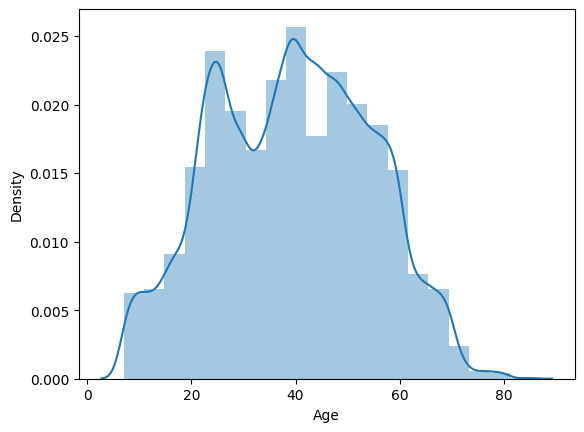

In [ ]:
sns.distplot(a=df['Age'], bins = 20)

**Discussion:**

From the histogram, I can check the age distribution of the customers. From the standard deviation and percentiles, I can suppose the distribution of the passengers' age. However, through the histogram, I can see at a glance more explicitly.

This histogram appears symmetrical around 40. In other words, half of the customers are under 40 and the others are over 40. Also, extreme outliers are not shown. Therefore, in terms of age, data is reliable to use.

<Axes: xlabel='Gender', ylabel='Age'>

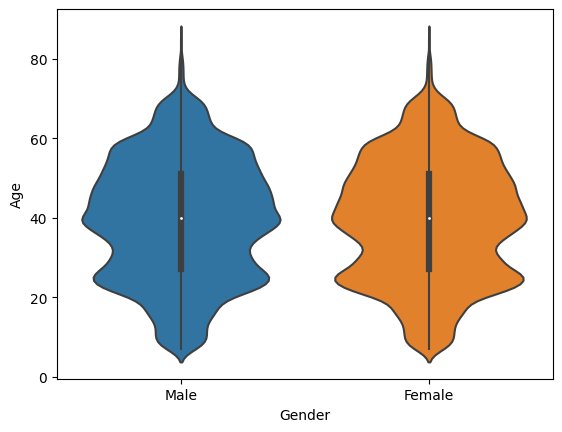

In [ ]:
sns.violinplot(data=df, x="Gender", y="Age")

**Discussion:**

The violin plot provides valuable insights into the age distribution of customers, showing that there are no outliers, and the median age is around 40 years old for both male and female customers. The majority of customers fall within the age range of their late 20s to early 50s. This analysis supports the conclusion that the dataset is well-distributed in terms of both gender and age, making it suitable for various analytical and modeling purposes.

<Axes: xlabel='Class', ylabel='count'>

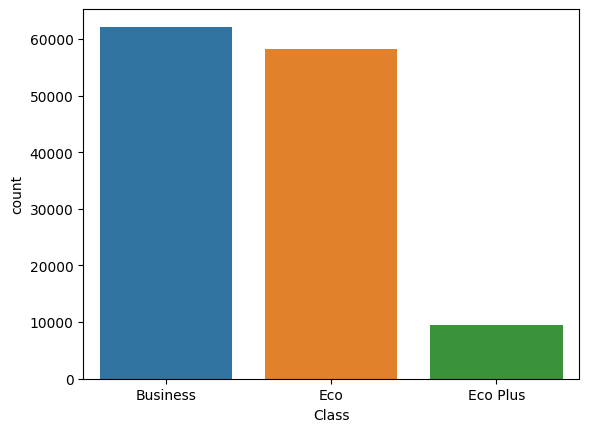

In [ ]:
c = df['Class'].value_counts()
sns.countplot(data=df, x='Class', order=c.index)

**Discussion:**

From this Pareto histogram, I can check the distribution of the class that customers used. This information is important because if the distribution is biased, then the model is created based on one class. To be specific, the satisfaction of passengers in one class alone cannot be used to make an accurate prediction.

Based on the above Pareto histogram, the number of 'Business' class customers and the number of 'Eco' class customers are similar. However, the number of 'Eco plus' class customers is much lesser than the other two groups. This result is similar to Section 2.2 'count'.

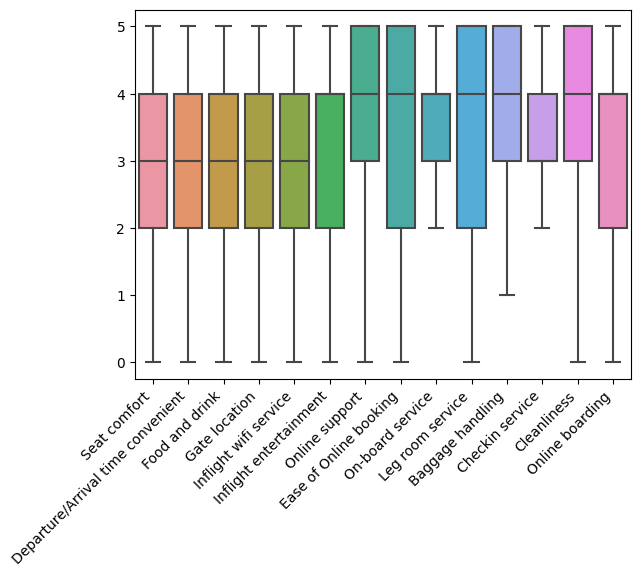

In [ ]:
selected_columns = df.iloc[:, 8:22]

survey_item_plot = sns.boxplot(data=selected_columns, showfliers=False)
survey_item_plot.set_xticklabels(survey_item_plot.get_xticklabels(), rotation=45, ha='right') # show x-axis labels convenient

plt.show()

**Discussion:**

To check the overall distribution of each survey section (each attribute from the data), I need to draw a boxplot. Through the distribution, I can suppose which attributes are more influential compared to the others. In the survey, the satisfaction level is between 0 to 5, so I removed outliers by using 'showfliers = false'.

Most of the attributes' median is 3, 25th percentile is 2, and 75th percentile is 4. 'Ease of online booking', and 'Leg room service' have more variability than others because their box size is larger than others. In contrast, 'On-board service', and 'Checkin service' show lower variability than others. It means that those attributes have little influence compared to the others. Finally, some of the survey sections such as 'Inflight entertainment' do not have a line in their box which means median value. This is because most values are concentrated on one value so the distribution is biased. For example, in the 'Inflight entertainment' section, most values are concentrated to a value of 4.

<ipython-input-36-c12f455ab4ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['Departure Delay in Minutes'], bins = 100)


<Axes: xlabel='Departure Delay in Minutes', ylabel='Density'>

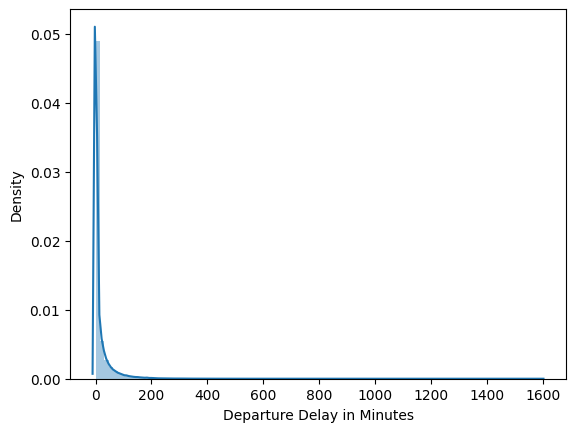

In [ ]:
sns.distplot(a=df['Departure Delay in Minutes'], bins = 100)

**Discussion:**

I want to check the relation between satisfaction and departure delay. To do this, it is necessary to check whether the data is distributed well.

Based on the histogram above, it is biased to the left and it means that most customers experienced less than 100 minutes delay. Therefore, it might be hard to get the relation between satisfaction and departure delay.

<ipython-input-37-9b7897781ba2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['Arrival Delay in Minutes'], bins = 100)


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

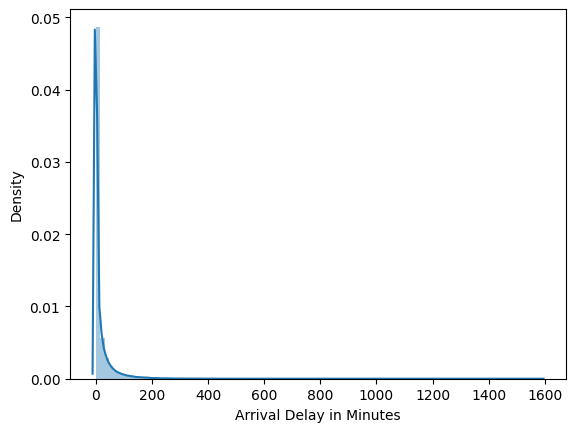

In [ ]:
sns.distplot(a=df['Arrival Delay in Minutes'], bins = 100)

**Discussion:**

I want to check the relation between satisfaction and arrival delay. To do this, it is necessary to check whether the data is distributed well.

Based on the histogram above, it is biased to the left and it means that most customers experienced less than 100 minutes delay. This is similar to the departure delay. Therefore, it might be hard to get the relation between satisfaction and arrival delay.

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

In [ ]:
print(df.isna().sum())

id                                     0
satisfaction_v2                        1
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  1
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


**Discussion:**

Some of the customers' data has been missed. As you can see from the above, some customers' data is just 'blanks'. For example, there are 393 customers who did not provide their 'Arrival Delay in Minutes'. It is better to remove missing data. In the arrival delay in minutes attribute, there are many missing data. I need to decide whether to remove all of them or except this attribute because the data distribution is biased as I showed in the above section.

In [ ]:
duplicate_rows = df.duplicated(subset=["id"])
print(df[duplicate_rows]["id"])

10481    10481
Name: id, dtype: int64


**Discussion:**

"id" is the unique section in this data. Therefore, duplicated data means duplicated "id". id = 10481 has been duplicated, so I need to delete one of them.

<Axes: >

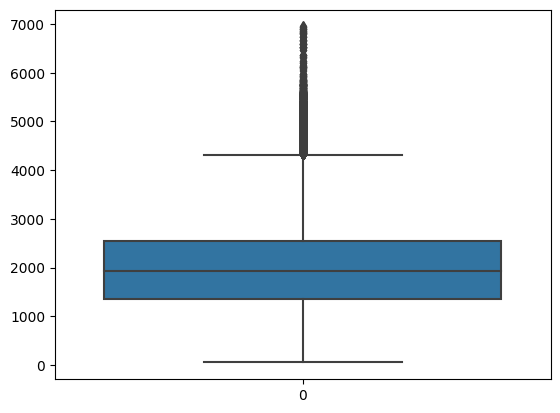

In [ ]:
sns.boxplot( df["Flight Distance"] )

**Discussion:**

In the 'Flight Distance' section, there are some outliers. As you can see from the box plot, there are some points above the whisker. Instead of removing all outliers, I will change those outliers into maximum value or median because there are many outliers.

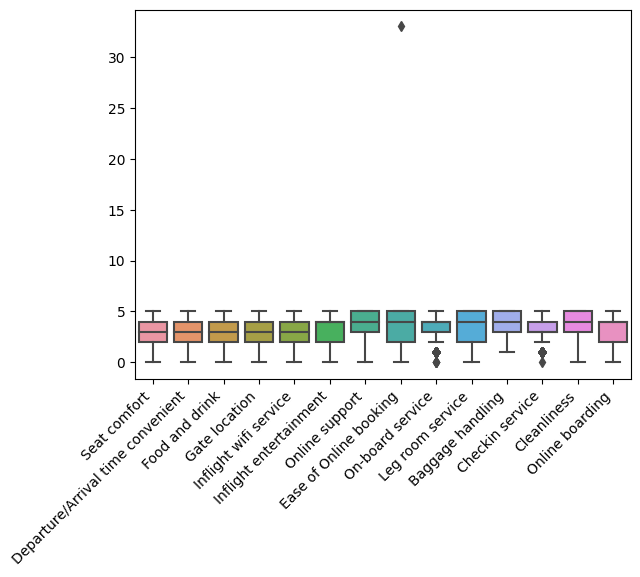

In [ ]:
selected_columns = df.iloc[:, 8:22]

survey_item = sns.boxplot(data=selected_columns)
survey_item.set_xticklabels(survey_item_plot.get_xticklabels(), rotation=45, ha='right')

plt.show()

**Discussion:**

In the 'Ease of Online booking', there is one outlier whose value is over 5. This is one of the survey items, so values must be 0 to 5. I think a customer's intention was 3, so I will change this value to 3 (originally 33). 'On-board service' and 'Checkin service' have some outliers as you can check from the above box plot. However, this is because of biased distribution. Therefore, I will keep those outliers. If it does not work, I will try to do other ways such as keeping those outliers or removing them.

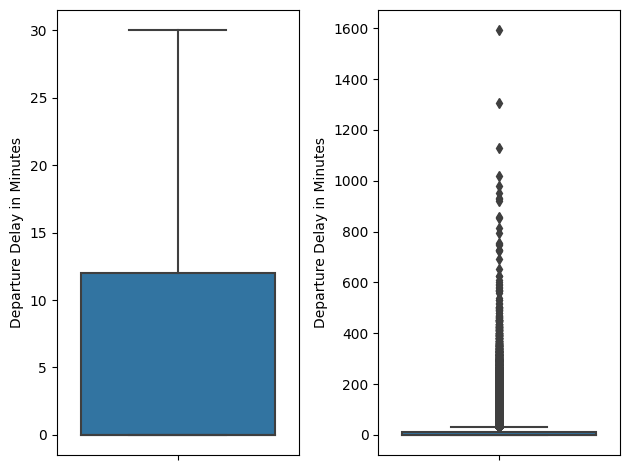

In [ ]:
fig, axes = plt.subplots(1, 2)

#left one is outliers are removed version and right one is containing outliers
sns.boxplot(data=df, y='Departure Delay in Minutes', ax=axes[0], showfliers=False)
sns.boxplot(data=df, y='Departure Delay in Minutes', ax=axes[1])

plt.tight_layout()

plt.show()

**Discussion:**

As you can check the data distribution of 'Departure Delay in Minutes' from Section 2.3, the data is biased distribution. Also, there are many outliers. If I remove all outliers, I will lose many data. I will consider how to deal with this attribute in the next section.

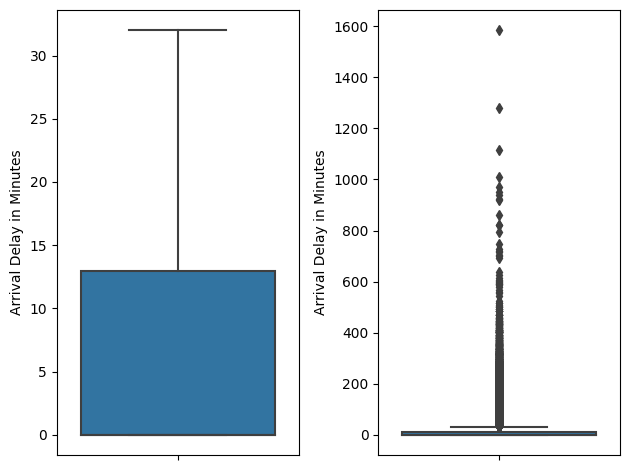

In [ ]:
fig, axes = plt.subplots(1, 2)

#left one is outliers are removed version and right one is containing outliers
sns.boxplot(data=df, y='Arrival Delay in Minutes', ax=axes[0], showfliers=False)
sns.boxplot(data=df, y='Arrival Delay in Minutes', ax=axes[1])

plt.tight_layout()

plt.show()

**Discussion:**

This is similar to 'Departure Delay in Minutes'. As you can check the data distribution of 'Arrival Delay in Minutes' from Section 2.3, the data is biased distribution. Also, there are many outliers. If I remove all outliers, I will lose many data. I will consider how to deal with this attribute in the next section.

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
***

In [ ]:
# calculate and show contingency table
print(pd.crosstab(df['satisfaction_v2'], df['Gender'], normalize='all'))
print()
# calculate chi square statistics and p-value
chi = chi2_contingency(pd.crosstab(df['satisfaction_v2'], df['Gender']))
print('Chi square:', format(chi[0]))
print('P-value:', format(chi[1]))

Gender                     Female      Male
satisfaction_v2                            
neutral or dissatisfied  0.176863  0.275808
satisfed                 0.000008  0.000000
satisfied                0.330505  0.216808
satisfied                0.000008  0.000000

Chi square: 5851.584827074725
P-value: 0.0


**Discussion:**

I compared between 'satisfaction' and 'Gender'. Both attributes are categorical, so I did cross-tabulations (contingency table) and a Chi-Squared test.

Based on the cross-tabulations, among females, 'satisfied' is 33.05% which is higher than 'neutral or dissatisfied'(17.69%). However, among males, 'satisfied' is 21.68% which is lower than 'neutral or dissatisfied'(27.58%). In the cross-tabulations, the sum of all elements is 1 when I normalized, so the percentage can be different if I do grouping by gender.

Through a Chi-Squared test. The P-value is 0.0, and it is lower than 0.05. I did not set a threshold, but the chi-square statistic is 5851.58 and I think it is high enough. Therefore, I can conclude that those two attributes have a significant relation in this dataset. In other words, 'satisfaction' is not independent of 'Gender'.

In [ ]:
# calculate and show contingency table
print(pd.crosstab(df['satisfaction_v2'], df['Customer Type'], normalize='all'))
print()
# calculate chi square statistics and p-value
chi = chi2_contingency(pd.crosstab(df['satisfaction_v2'], df['Customer Type']))
print('Chi square:', format(chi[0]))
print('P-value:', format(chi[1]))

Customer Type            Loyal Customer  disloyal Customer
satisfaction_v2                                           
neutral or dissatisfied        0.313466           0.139205
satisfed                       0.000008           0.000000
satisfied                      0.503426           0.043887
satisfied                      0.000008           0.000000

Chi square: 11119.141895325534
P-value: 0.0


**Discussion:**

I compared 'satisfaction' and 'Customer Type'. Both attributes are categorical, so I did cross-tabulations (contingency table) and a Chi-Squared test.

Through the cross-tabulations, the result seems to be above table. As a result, 50% of the total were ‘satisfied’ and they are loyal customers, and 4.39% of the total were ‘satisfied’ and were disloyal customers. Compared to loyal customers, 'satisfied' is higher than 'neutral and dissatisfied'. Compared to disloyal customers, 'satisfied' is lower than 'neutral and dissatisfied'.

Through a Chi-Squared test. The P-value is 0.0, and it is lower than 0.05. I did not set a threshold, but the chi-square statistic is 11119.14 and I think it is high enough. Therefore, I can conclude that those two attributes have a significant relation in this dataset.

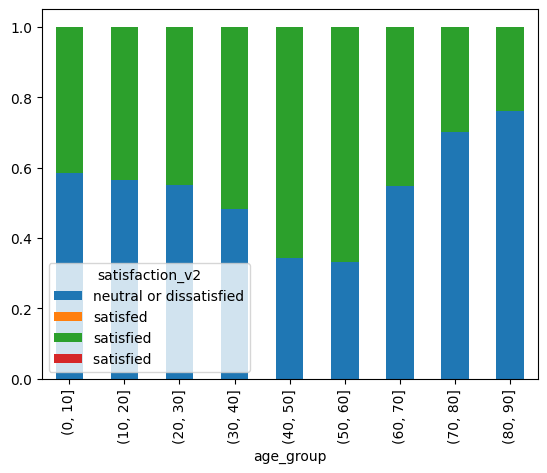

In [ ]:
df['age_group'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
cross_tab = pd.crosstab(df['age_group'], df['satisfaction_v2'], normalize='index')
cross_tab.plot(kind='bar', stacked=True)
plt.show()

**Discussion:**

To observe the relation between 'satisfaction' and 'Age', I used cross-tabulations, and a bar chart from cross-tabulations.

Each group is divided into 10-year age increments, and after normalization, most groups had a higher proportion of 'neutral or dissatisfied', but the 40s and 50s groups had a higher proportion of 'satisfied'. This is an interesting point for me. The 'Age' attribute might be useful when it is combined with other attributes.

In [ ]:
# calculate and show contingency table
print(pd.crosstab(df['satisfaction_v2'], df['Type of Travel'], normalize='all'))
print()
# calculate chi square statistics and p-value
chi = chi2_contingency(pd.crosstab(df['satisfaction_v2'], df['Type of Travel']))
print('Chi square:', format(chi[0]))
print('P-value:', format(chi[1]))

Type of Travel           Business travel  Personal Travel
satisfaction_v2                                          
neutral or dissatisfied         0.287473         0.165199
satisfed                        0.000008         0.000000
satisfied                       0.403095         0.144218
satisfied                       0.000008         0.000000

Chi square: 1550.5209956522713
P-value: 0.0


**Discussion:**

I compared between 'satisfaction' and 'Type of Travel'. Both attributes are categorical, so I did cross-tabulations (contingency table) and a Chi-Squared test.

Through the cross-tabulations, the result seems to be above table. As a result, 40.31% of the total were ‘satisfied ’ and they travel for business, and 14.42% of the total were ‘satisfied’ and they travel for personal reasons. Compared to business travel, 'satisfied' is higher than 'neutral and dissatisfied'. Compared with personal travel, 'satisfied' is lower than 'neutral and dissatisfied' but the difference is small.

Through a Chi-Squared test. The P-value is 0.0, and it is lower than 0.05, therefore, I can conclude that those two attributes have a significant relation in this dataset.

In [ ]:
# calculate and show contingency table
print(pd.crosstab(df['satisfaction_v2'], df['Class'], normalize='all'))
print()
# calculate chi square statistics and p-value
chi = chi2_contingency(pd.crosstab(df['satisfaction_v2'], df['Class']))
print('Chi square:', format(chi[0]))
print('P-value:', format(chi[1]))

Class                    Business       Eco  Eco Plus
satisfaction_v2                                      
neutral or dissatisfied  0.139090  0.272067  0.041515
satisfed                 0.000008  0.000000  0.000000
satisfied                0.339490  0.176879  0.030944
satisfied                0.000008  0.000000  0.000000

Chi square: 12672.83982104123
P-value: 0.0


**Discussion:**

I compared between 'satisfaction' and 'Class'. Both attributes are categorical, so I did cross-tabulations and a Chi-Squared test.

Through the cross-tabulations, the result seems to be above table. As a result, 33.95% of the total were ‘satisfied and they are business class customers, and 17.69% of the total were ‘satisfied’ and they are economy class customers. 3.1% of the total were 'satisfied' and they are economy plus class customers. Compared to business class customers, 'satisfied' is higher than 'neutral and dissatisfied'. The reason why Economy Plus customers' overall proportion is small is that the number of customers who were in Economy Plus is small.

Through a Chi-Squared test. The P-value is 0.0, and it is lower than 0.05. I did not set a threshold, but the chi-square statistic is 12672.84 and I think it is high enough. Therefore, I can conclude that those two attributes have a significant relation in this dataset.

<Axes: xlabel='satisfaction_v2', ylabel='Flight Distance'>

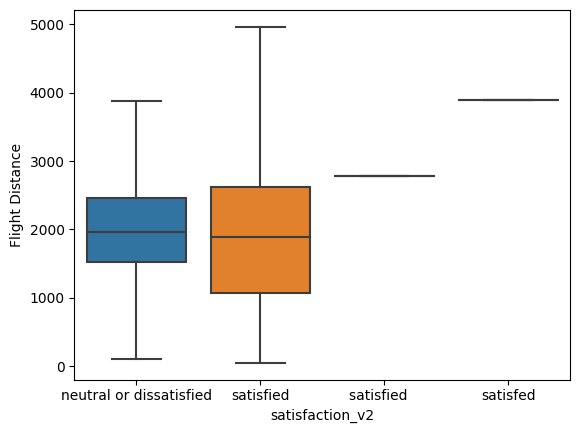

In [ ]:
sns.boxplot( x=df["satisfaction_v2"], y=df["Flight Distance"], showfliers=False)

**Discussion:**

I think there is a relationship between flight distance and customer satisfaction. Therefore, I draw a boxplot between those two attributes to see the distribution by different satisfaction. There are many outliers shown as points beyond the lowest/highest line in 'neutral or dissatisfied' and 'satisfied'. (It does not show the above plot because I removed it from the plot.) Both 50th percentiles (median) value looks similar, but the 'satisfied' box size is larger than 'neutral or dissatisfied'. It means that the 'satisfied' group has higher variability for the flight distance. I think that higher flight distance can provide more service to consider, and it contributes the results like the above.

<ipython-input-64-c3fa9ab9516b>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_matrix, dtype=np.bool)


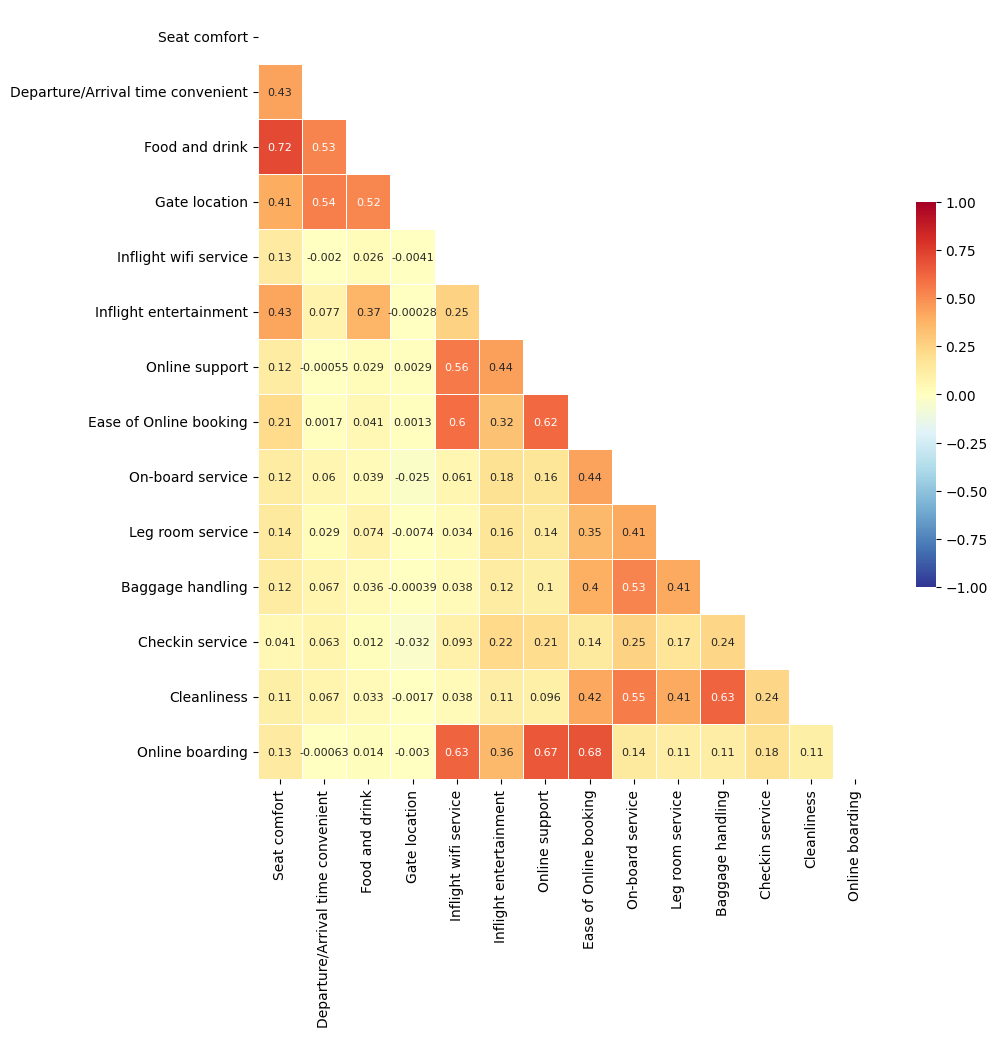

In [ ]:
# relations between survey items (column 8 to 22) using correlation matrix
survey_items = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                'Inflight wifi service', 'Inflight entertainment', 'Online support',
                'Ease of Online booking', 'On-board service', 'Leg room service',
                'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

correlation_matrix = df[survey_items].corr()

fig, ax = plt.subplots(figsize=(10,10))

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # to make triangular heatmap

# show result using heatmap
sns.heatmap(correlation_matrix, cmap='RdYlBu_r', annot=True, mask=mask, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot_kws={"size": 8}, vmin=-1, vmax=1)

plt.show()

**Discussion:**

To check each survey item attribute relation (their positive or negative association), I used correlation and visualized using a heatmap.

'Seat comfort' and 'Food and drink' have a strong positive correlation (0.72). 'Online boarding' and 'Online support' have a strong positive correlation (0.67). Also, 'Online boarding' and 'Ease of Online booking' have a strong correlation (0.68). 'Online boarding' has a strong correlation with 'Inflight wifi service'. 'Ease of online booking' and 'Inflight Wi-Fi service' have a strong correlation (0.6). And 'Ease of online booking' and 'Online support' have a strong correlation (0.62) 'Cleanliness' and 'Baggage handling' have a strong positive correlation (0.63).

Consequently, not all survey item attributes are correlated, but some of the attributes have a correlation. For example, a customer who makes a high score for 'Seat comfort' may give a high score for 'Food and drink'. This is not a causality but those attributes are not independent of each other.


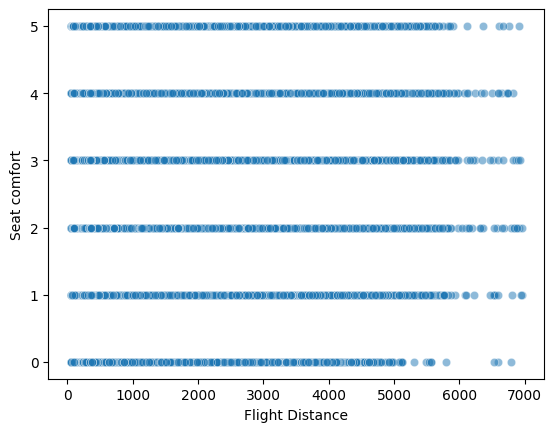

Correlation coefficient: -0.04


In [ ]:
# draw scatter plot using flight distance and seat comfort
sns.scatterplot(data=df, x='Flight Distance', y='Seat comfort', alpha=0.5)
plt.show()

# calculate correlation coefficient
correlation_coefficient = df['Flight Distance'].corr(df['Seat comfort'])
print(f'Correlation coefficient: {correlation_coefficient:.2f}')

**Discussion:**

Using a scatter plot and correlation coefficient, I try to find out the relation between 'Flight Distance' and 'Seat comfort'. As you can see from the above scatter plot, points are scattered horizontally, and the correlation coefficient is -0.04. In summary, it is hard to decide whether those attributes are related to each other because there is no positive or negative relation between those two attributes - Regardless of the distance between planes, the distribution of seat comfort scores is similar.

In [ ]:
grouped = df.groupby('satisfaction_v2')['Departure Delay in Minutes'].mean()
print(grouped)

satisfaction_v2
neutral or dissatisfied    17.807749
satisfed                    0.000000
satisfied                  12.155546
satisfied                   0.000000
Name: Departure Delay in Minutes, dtype: float64


**Discussion:**

Using group-wise average, I can check the relation between 'satisfaction_v2' and 'Departure Delay in Minutes'. For 'neutral or dissatisfied' customers' the average departure delay time is 17.81 minutes, whereas for 'satisfied' customers' the average departure delay time is 12.16 minutes. I did not remove or revise outliers, and the difference between the two satisfaction is about 5 minutes. Based on the current result, 'Departure Delay in Minutes' does not affect a lot of 'satisfaction'.

In [ ]:
grouped = df.groupby('satisfaction_v2')['Arrival Delay in Minutes'].mean()
print(grouped)

satisfaction_v2
neutral or dissatisfied    18.504599
satisfed                    1.000000
satisfied                  12.269681
satisfied                   0.000000
Name: Arrival Delay in Minutes, dtype: float64


**Discussion:**

Using group-wise average, I can check the relation between 'satisfaction_v2' and 'Arrival Delay in Minutes'. For 'neutral or dissatisfied' customers' the average arrival delay time is 18.5 minutes, whereas for 'satisfied' customers' the average arrival delay time is 12.27 minutes. I did not remove or revise outliers, and the difference between the two satisfaction is about 6 minutes. Based on the current result, 'Arrival Delay in Minutes' does not affect a lot of 'satisfaction'.

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

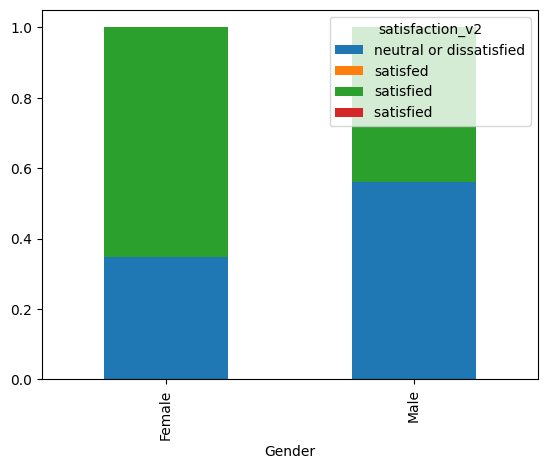

In [ ]:
cross_tab = pd.crosstab(df['Gender'], df['satisfaction_v2'], normalize='index')
cross_tab.plot(kind='bar', stacked=True)
plt.show()

**Discussion:**

From Section 2.5, I can decide that there is a significant relationship between gender and satisfaction. An interesting point is that the proportion of 'satisfied' is higher than 'neutral or dissatisfied' among females. Whereas, the proportion of 'satisfied' is lower than 'neutral or dissatisfied' among males.

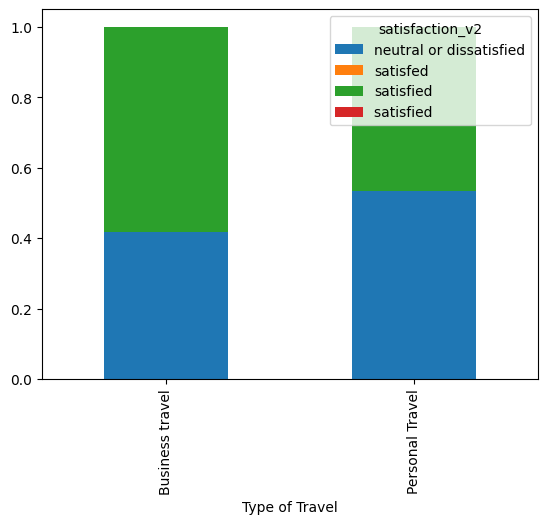

In [ ]:
cross_tab = pd.crosstab(df['Type of Travel'], df['satisfaction_v2'], normalize='index')
cross_tab.plot(kind='bar', stacked=True)
plt.show()

**Discussion:**

From Section 2.5, I can decide that there is a significant relationship between the type of travel and satisfaction. An interesting point is that the proportion of 'satisfied' is higher than 'neutral or dissatisfied' for business travel. Whereas, the proportion of 'satisfied' is slightly lower than 'neutral or dissatisfied' for personal travel.

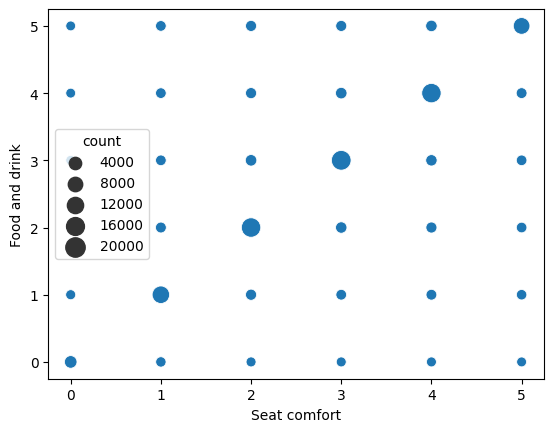

In [ ]:
frequency = df.groupby(['Seat comfort', 'Food and drink']).size().reset_index(name='count')

# different size of dots based on different frequency for each value
size = frequency['count']

sns.scatterplot(data=frequency, x='Seat comfort', y='Food and drink', size=size, sizes=(50, 200))

plt.show()

**Discussion:**

As I mentioned earlier (Section 2.5), 'Seat comfort' and 'Food and drink' have a strong positive correlation. From the scatter plot above, it can be visualization. This scatter plot has different point sizes - the more values from the data, the larger points. Large points are located in positive linear, so those two attributes have a strong positive correlation.

***
# Section: 3 - Data Preparation
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.

**NOTE:** In each of these sections, it is OK to decide to **not** make changes to the dataset, but you **must** explain **why** you made the choice.  Recall that the purpose of this step is to produce a clean dataset that is suitable for the intended purposes.  So, for example, you might choose to not remove any attributes, but if you have 100 apparently irrelevant attributes, explain why are you keeping them - there may be a good reason.
***

***
## Section: 3.1 - Clean the Data
- Implement any data cleaning steps previously identified.  Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

In [ ]:
# create a copy of the dataset for cleaning
clean_data_df = df.copy()

In [ ]:
# correction typo
clean_data_df['satisfaction_v2'] = clean_data_df['satisfaction_v2'].replace(to_replace='satisfed', value = 'satisfied')

**Discussion:**

I corrected typo satisfed into satisfied in 'satisfaction_v2'.

In [ ]:
# remove missing data
clean_data_df['satisfaction_v2'] = clean_data_df['satisfaction_v2'].str.strip()
clean_data_df.dropna(subset=['Inflight entertainment'], inplace=True)

clean_data_df.dropna(inplace=True)

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


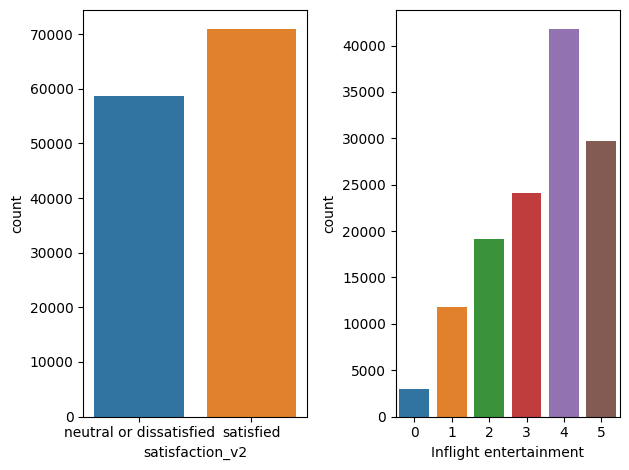

In [ ]:
# show changed one into bar graph
_, axes = plt.subplots(1, 2)

sns.countplot(data=clean_data_df, x='satisfaction_v2', ax=axes[0])

sns.countplot(data=clean_data_df, x='Inflight entertainment', ax=axes[1])

plt.tight_layout()

print(clean_data_df.isna().sum())

**Discussion:**

I remove 'blank' data. You can see there is no more blank data based on the chart above. There was one blank data in 'satisfaction_v2', but there is no more blank data in 'satisfaction_v2' as you can check from the top left bar graph. Similarly, there was one blank data in 'Inflight entertainment', but there is no more blank data as you can check from the top right bar graph.

In [ ]:
# remove duplicated data
clean_data_df = clean_data_df.drop(10481)

duplicate_rows = clean_data_df.duplicated(subset=["id"])
print(clean_data_df[duplicate_rows]["id"])

Series([], Name: id, dtype: int64)


In [ ]:
print(clean_data_df[clean_data_df['id'] == 10481].to_string(index=False))

   id satisfaction_v2 Gender  Customer Type  Age  Type of Travel    Class  Flight Distance  Seat comfort  Departure/Arrival time convenient  Food and drink  Gate location  Inflight wifi service  Inflight entertainment  Online support  Ease of Online booking  On-board service  Leg room service  Baggage handling  Checkin service  Cleanliness  Online boarding  Departure Delay in Minutes  Arrival Delay in Minutes
10481       satisfied Female Loyal Customer   50 Business travel Business             1881             0                                  0               0              2                    2.0                       4               4                       2                 2                 2                 2                3            2                4                          31                      33.0


**Discussion:**

In original data, id = 10481 data is duplicated, so I remove one of it.
Based on below code "duplicate_rows = df.duplicated(subset=["id"])", you can check that there is no more duplicated rows. When I search id = 10481, there is only one row is shown.

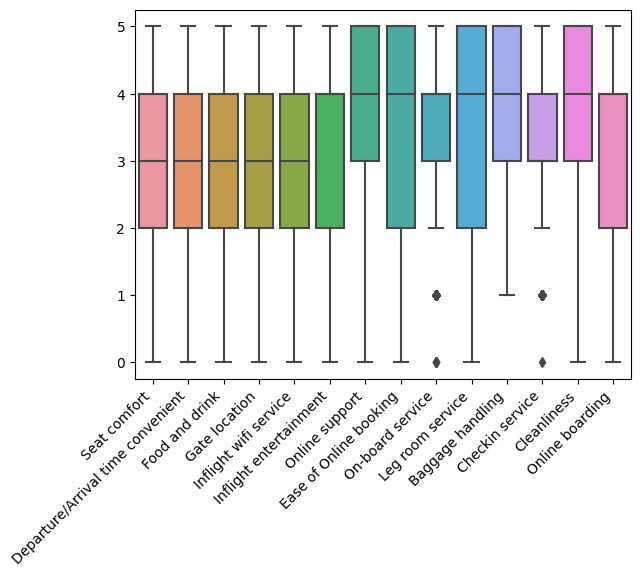

In [ ]:
# change outlier value
clean_data_df['Ease of Online booking'] = clean_data_df['Ease of Online booking'].replace(33, 3)

survey_item = sns.boxplot(data=clean_data_df.iloc[:, 8:22])
survey_item.set_xticklabels(survey_item.get_xticklabels(), rotation=45, ha='right')

plt.show()

**Discussion:**

I changed one outlier - in Ease of Online booking, the value of 33 into 3. This is because survey items' value must be within 0 to 5, so I believe that the customer originally intended to use 3 but mistakenly wrote 33. Other outliers from the other attributes are kept first. If it is necessary, I will adjust them later. (Their outlier seems to occur because values are concentrated into a narrow range, so it may be fine to keep it now.)

***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

In [ ]:
clean_data_df = clean_data_df.drop('Departure Delay in Minutes', axis=1)
clean_data_df = clean_data_df.drop('Arrival Delay in Minutes', axis=1)

In [ ]:
clean_data_df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
count,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000,129485.000000
mean,64959.154002,39.428806,1981.022049,2.838622,2.990315,2.852045,2.990400,3.249149,3.383736,3.519952,3.472163,3.465143,3.486126,3.695447,3.340727,3.705881,3.352535
std,37489.466112,15.117699,1026.878420,1.392852,1.527162,1.443577,1.305913,1.318772,1.345968,1.306329,1.305581,1.270763,1.292082,1.156490,1.260569,1.151692,1.298631
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32496.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,64973.000000,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,97416.000000,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**Discussion:**

I removed the 'Departure Delay in Minutes' attribute and the 'Arrival Delay in Minutes' attribute. First, there are many outliers, but it is not the main reason to remove them. Second, based on the group-wise average (Section 2.5), the difference in average time (in minutes) between 'satisfied' and 'neutral or dissatisfied' is small, so I think it is not a useful attribute to predict satisfaction. Finally, when I try to find any correlation between other attributes such as 'Gate location', there is no specific relation.

***
## Section: 3.3 - Create Attributes
- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.
***

**Discussion:**

I decided not to create new attributes based on the values of other attributes because current attributes and their values are enough to be used. In other words, attributes' values and relations within current attributes are enough to create a prediction model.

***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

In [ ]:
# change flight distance into categorical
bins = [0, clean_data_df['Flight Distance'].quantile(0.25), clean_data_df['Flight Distance'].quantile(0.5), clean_data_df['Flight Distance'].quantile(0.75), float('inf')]
labels = ['short distance', 'mid distance', 'long distance', 'super long distance']

clean_data_df['Flight Distance category'] = pd.cut(clean_data_df['Flight Distance'], bins=bins, labels=labels)

<Axes: xlabel='Flight Distance category', ylabel='count'>

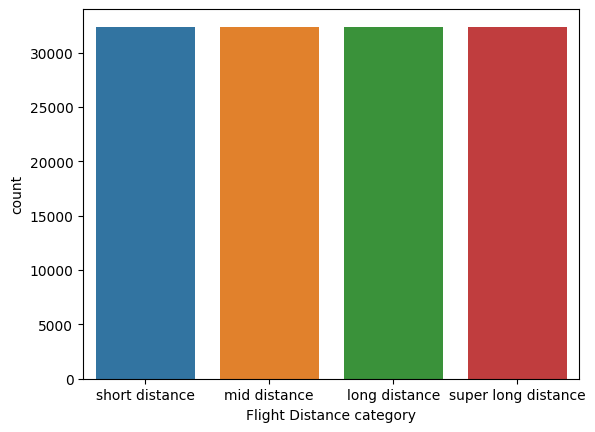

In [ ]:
#visualize it using bar graph
sns.countplot(data=clean_data_df, x='Flight Distance category')

**Discussion:**

Categorizing 'Flight Distance' into short, mid, long, and super long-distance categories can be reasonable in this case. 'Flight Distance' has a wide range of values and there are many outliers. Instead of keeping numerical values, it is better to change them into categorical values to get a relation with other attributes or use them to identify patterns or trends in the dataset. Additionally, I used percentiles in when I divided it, so there are four approximately  equal-sized groups, which can be useful for analyzing the data patterns.

***
## Section: 3.5 - Select Records
- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.
***

**Discussion:**

I decided not to do something to decrease the size of the dataset. If I am doing random sampling, I cannot guarantee that the sample dataset represents the whole dataset. There may not be some cases or patterns that need to be detected. I finally built a prediction model, so I think it is important to explore patterns in the dataset and it is better to do with the full dataset.

***
## Section: 3.6 - Other Data Preparation
- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.
***

In [ ]:
clean_data_df.to_excel('clean_data.xlsx', index=False)

**Discussion:**

I decided not to perform other preparation steps because the above steps are enough to clean data. What I did above is to save a cleaned dataset named 'clean_data_df' as an excel file for later.

***
# Section: 4 - Modeling - SKIP THIS!
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

**Discussion:**

Fill in...

***
# Section: 5 - Evaluation - SKIP THIS!
In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

**Discussion:**

Fill in...

***
# Section: 6 - Deployment - SKIP THIS!
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**

Fill in...

***
# Section: Conclusions
- What did you learn from this exercise?
***

**Discussion:**

The initially downloaded data contained missing data, duplicated data, and outliers, which could be confirmed in Section 2.4. Based on this, we modified the dataset in Section 3 and created cleaned_data.

Through this homework assignment, I gained valuable hands-on experience in the analysis and processing of datasets, which can be directly applied to real-world scenarios. It allowed me to put my theoretical knowledge of various statistical techniques into practical use.

I found the exploration of correlations within the data to be particularly fascinating. I had the opportunity to investigate correlations between numerical variables, between categorical variables, and between numerical and categorical variables using a variety of statistical techniques. This not only deepened my understanding of the data but also provided insights into the relationships and patterns that exist within it.

Overall, this practical experience was a valuable step in bridging the gap between theory and application, and it highlighted the importance of data analysis and preprocessing in real-world data science and analytical projects.